## Tests for Zernike polynomials 

In [16]:
%%capture
%load_ext autoreload
%autoreload 2

exec(open('../codes/zernike.py'))
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

### Compare polar and Cartesian

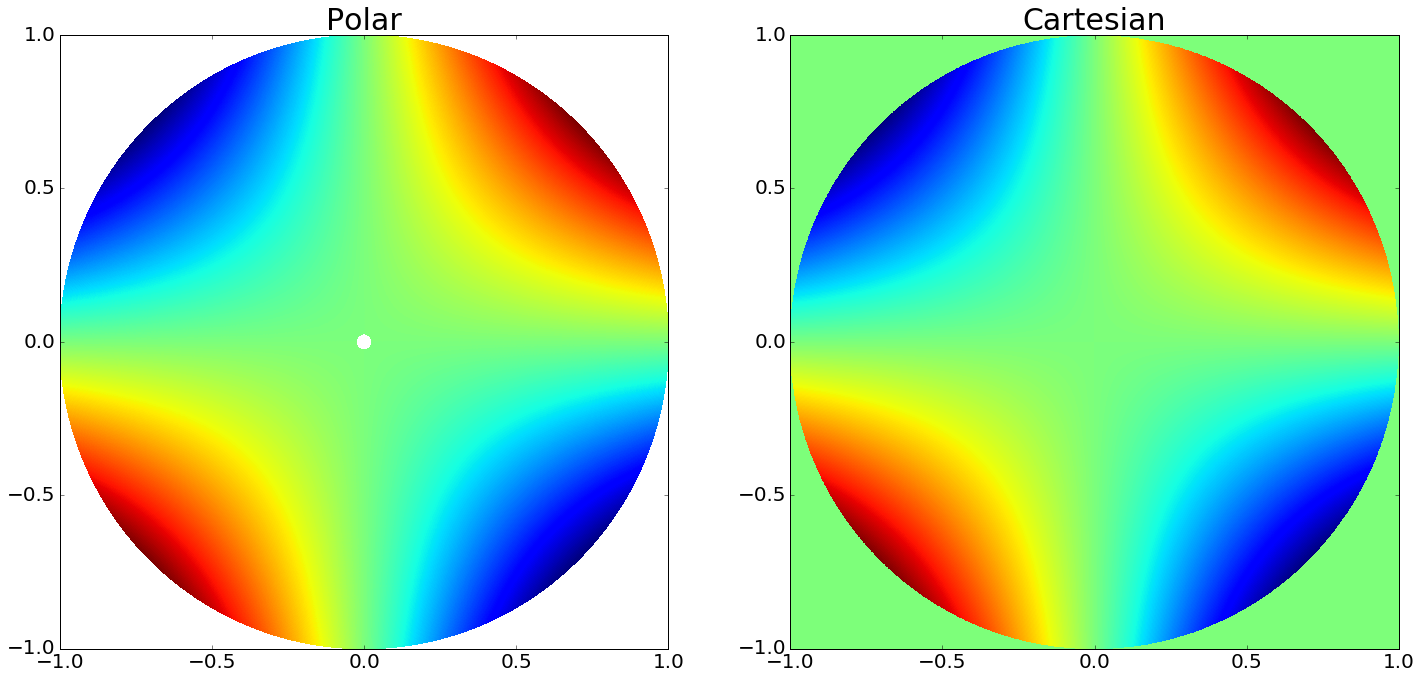

In [26]:
## Oblique astigmatism
ast45 = Zernike(Z5=1,Npix=2048)

plt.figure(figsize=(24,11))
plt.subplot(121); appolar = ast45.crPolarAber(); plt.title('Polar')
plt.subplot(122); apcarte = ast45.crCartAber(); plt.title('Cartesian')

- Pros of polar: no need to mask out the non-aperture region
- Cons of polar: there is a white dot in the center, where the grid fails to cover (visually it gets larger when Npix increases). On the other hand, polar calculation outputs strange Z1 mode (piston) as well:

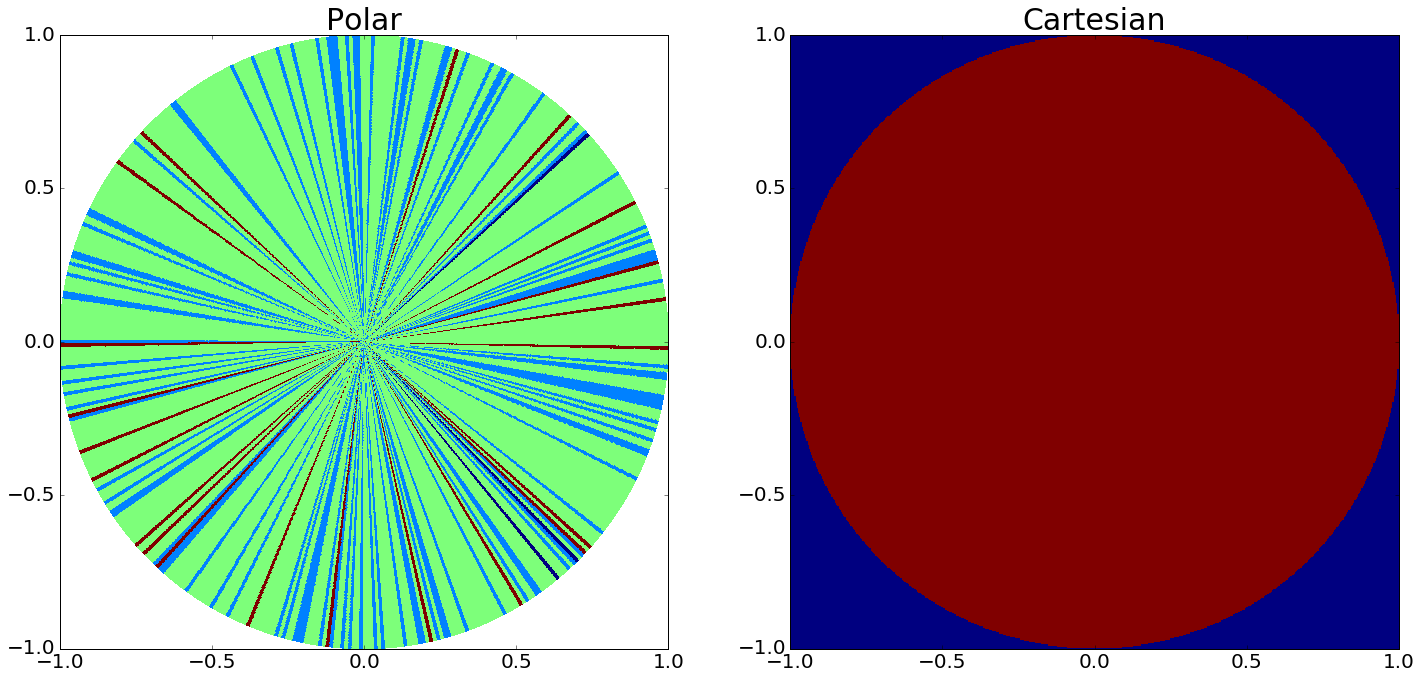

In [34]:
pis = Zernike(Z1=1,Npix=512)

plt.figure(figsize=(24,11))
plt.subplot(121); appolar = pis.crPolarAber(); plt.title('Polar')
plt.subplot(122); apcarte = pis.crCartAber(); plt.title('Cartesian')

So we should use the Cartesian one...

### Normalization
One important aspect of implementing the Cartesian one is to make sure that the normalization is correct. Below shows the range of the aberration within the aperture. Agreements between polar and Cartesian ones settle the issue.

Polar     : Max = 14.74 / Min = -11.61
Cartesian : Max = 14.72 / Min = -11.61


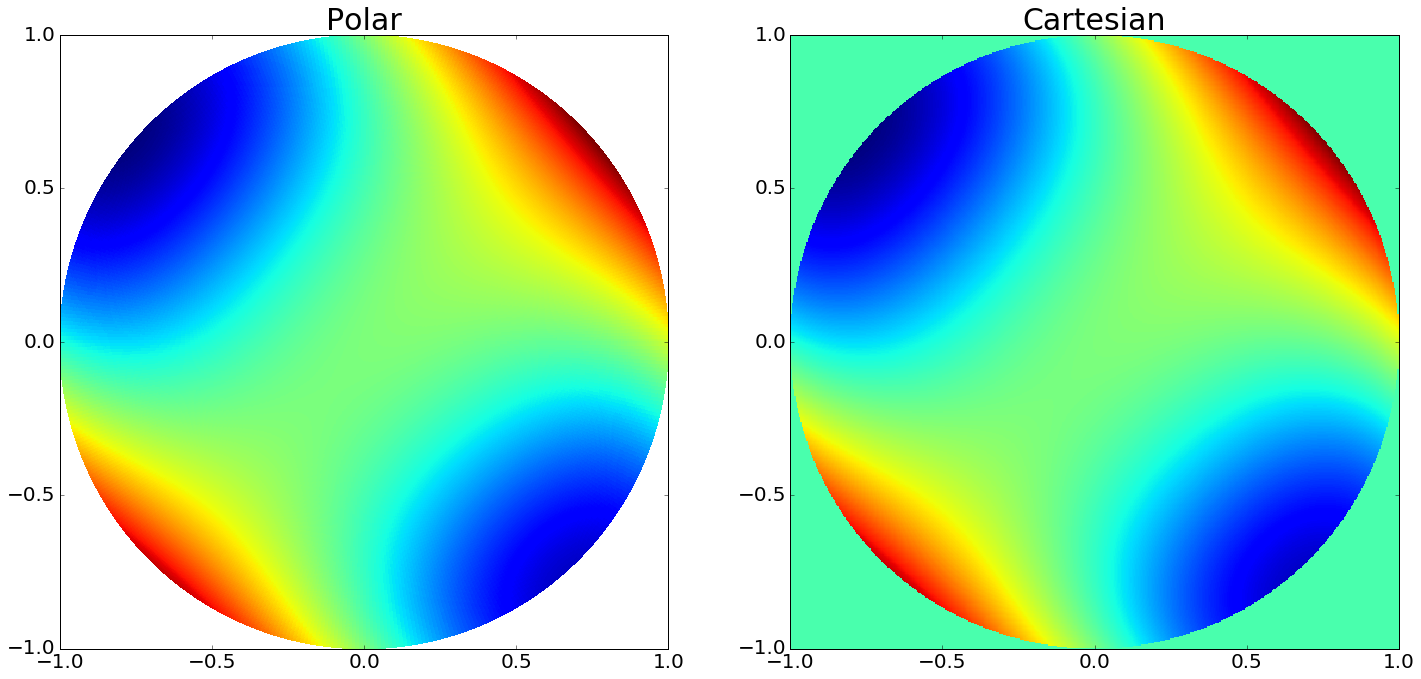

In [30]:
## some combination
test = Zernike(Z2=1,Z5=5,Z10=0.3,Z11=0.7,Npix=512)

plt.figure(figsize=(24,11))
plt.subplot(121); testpolar = test.crPolarAber(); plt.title('Polar')
plt.subplot(122); testcarte = test.crCartAber(); plt.title('Cartesian')

print 'Polar     : Max = {0:.2f} / Min = {1:.2f}'.format(testpolar.max(),testpolar.min())
print 'Cartesian : Max = {0:.2f} / Min = {1:.2f}'.format(testcarte.max(),testcarte.min())

### Miscellaneous
For sanity check, let us plot some common Zernike modes:

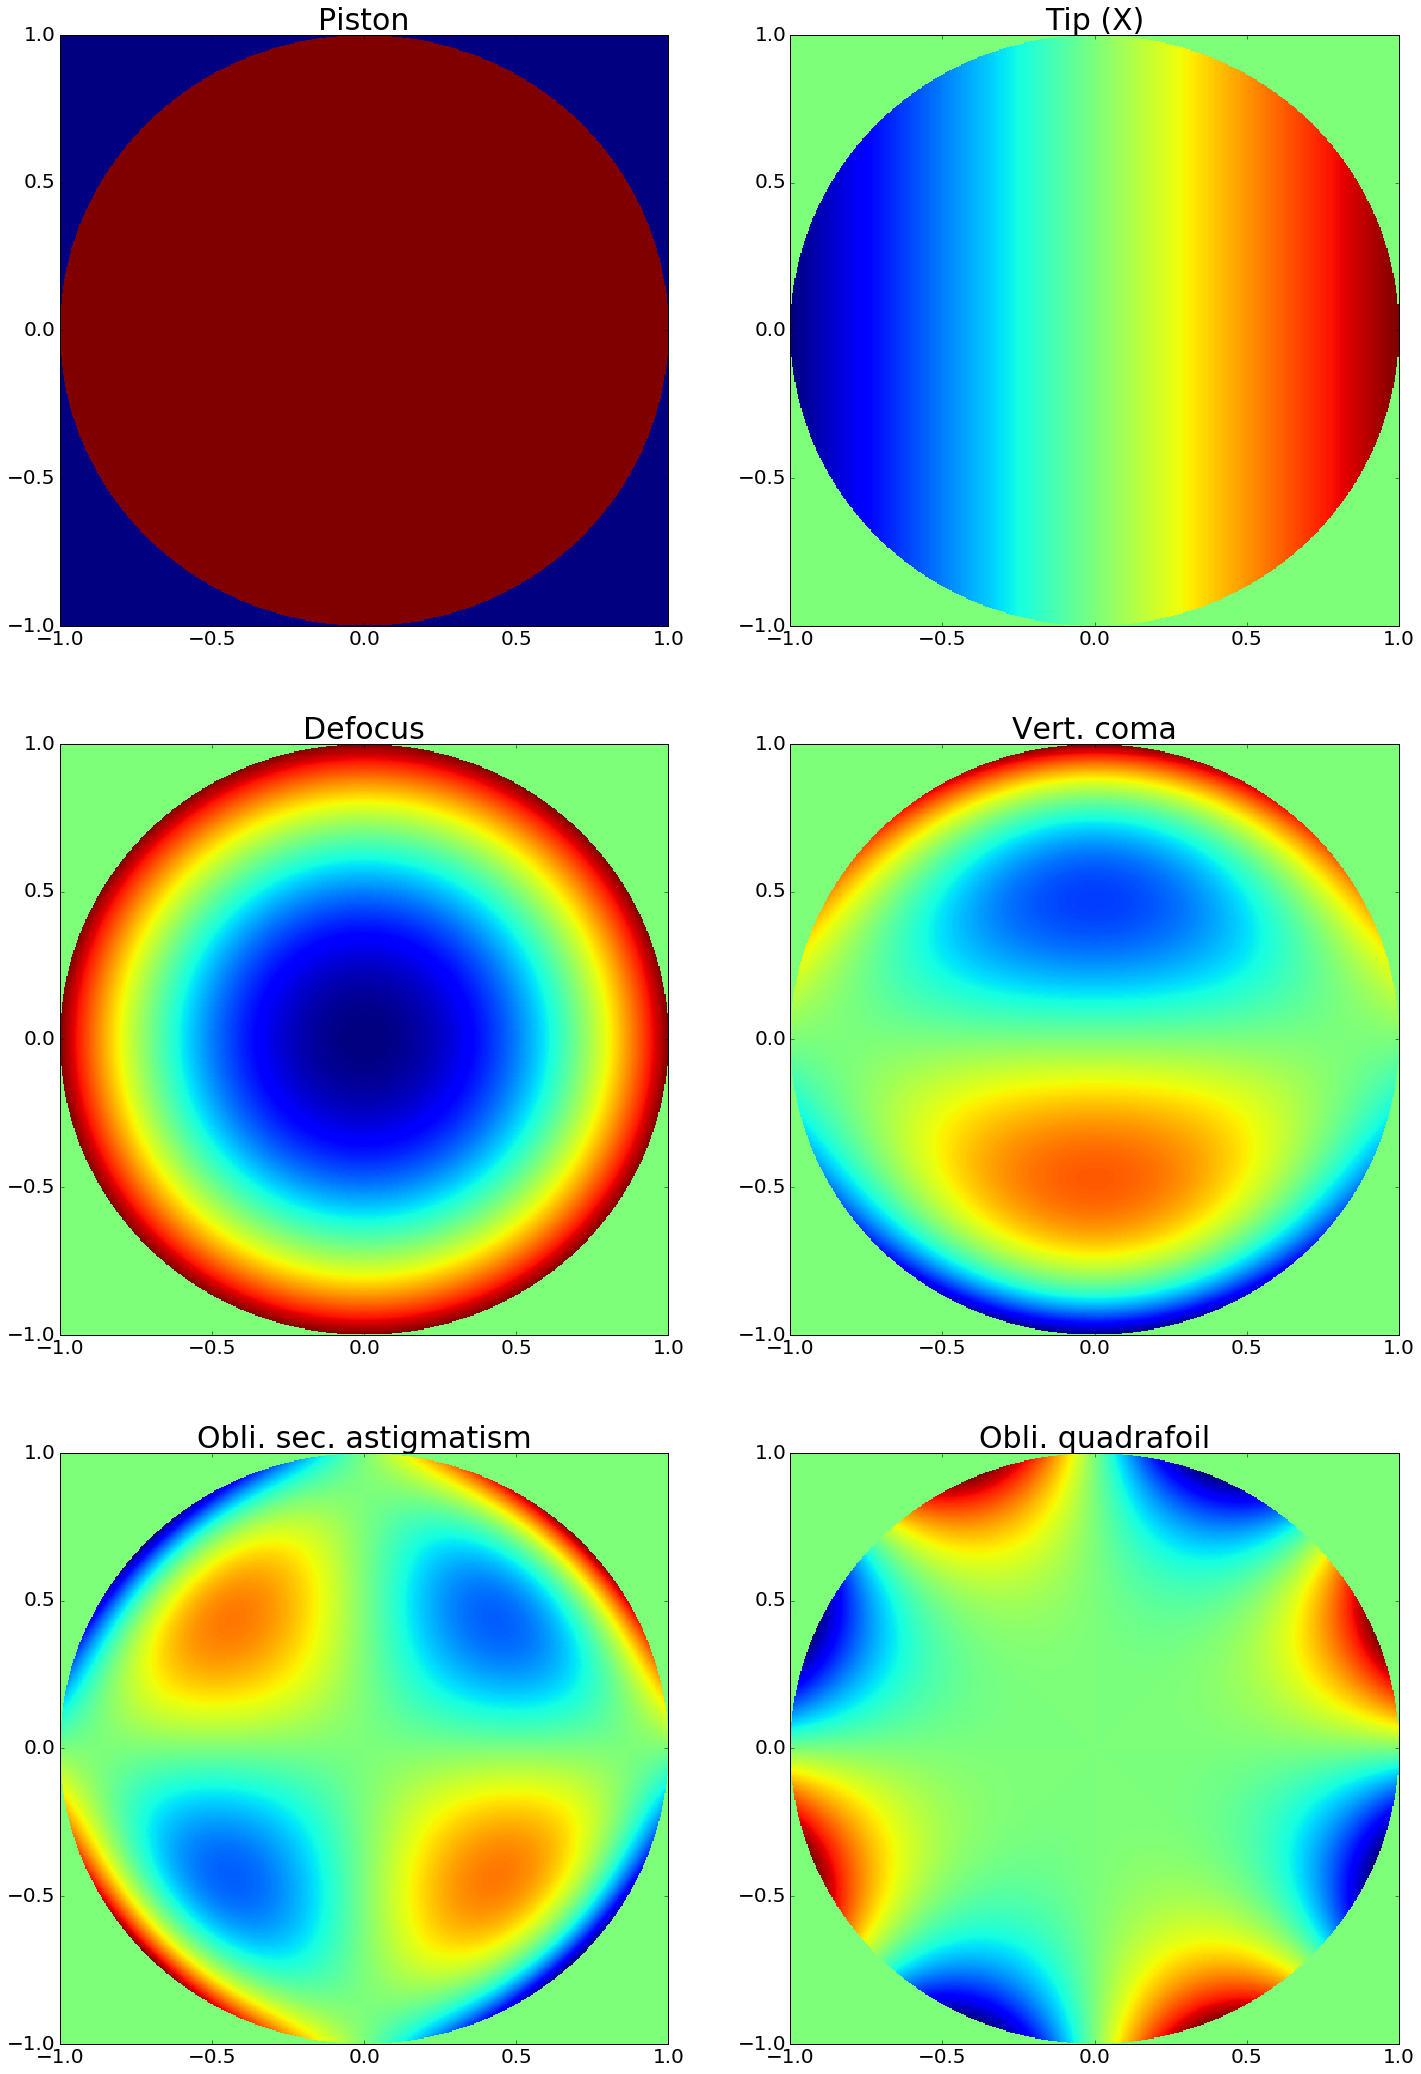

In [37]:
## 
z1 = Zernike(Z1=1,Npix=512)
z2 = Zernike(Z2=1,Npix=512)
z4 = Zernike(Z4=1,Npix=512)
z7 = Zernike(Z7=1,Npix=512)
z13 = Zernike(Z13=1,Npix=512)
z15 = Zernike(Z15=1,Npix=512)

plt.figure(figsize=(24,36))
plt.subplot(321); z11 = z1.crCartAber(); plt.title('Piston')
plt.subplot(322); z21 = z2.crCartAber(); plt.title('Tip (X)')
plt.subplot(323); z41 = z4.crCartAber(); plt.title('Defocus')
plt.subplot(324); z71 = z7.crCartAber(); plt.title('Vert. coma')
plt.subplot(325); z131 = z13.crCartAber(); plt.title('Obli. sec. astigmatism')
plt.subplot(326); z151 = z15.crCartAber(); plt.title('Obli. quadrafoil')